In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bike_sales_india.csv to bike_sales_india.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bike_sales_india.csv', encoding='latin-1')
df

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


NameError: name 'df' is not defined

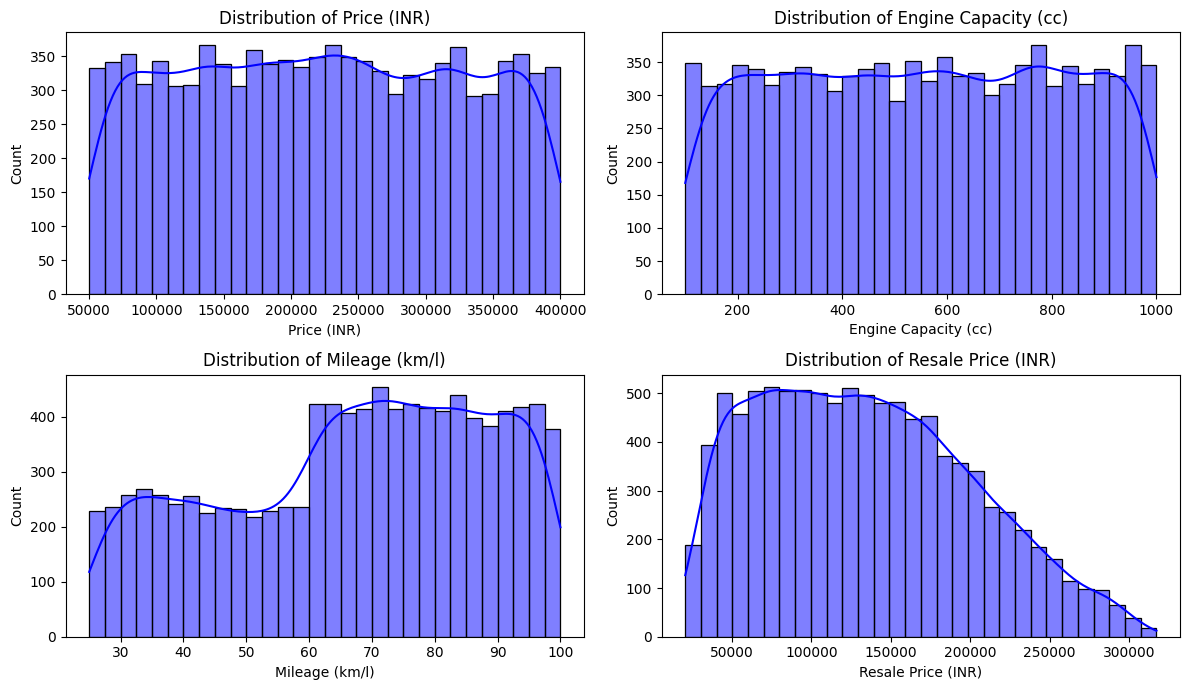

In [ ]:
# Histograms for numerical variables
numerical_cols = ["Price (INR)", "Engine Capacity (cc)", "Mileage (km/l)", "Resale Price (INR)"]
plt.figure(figsize=(12, 7))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

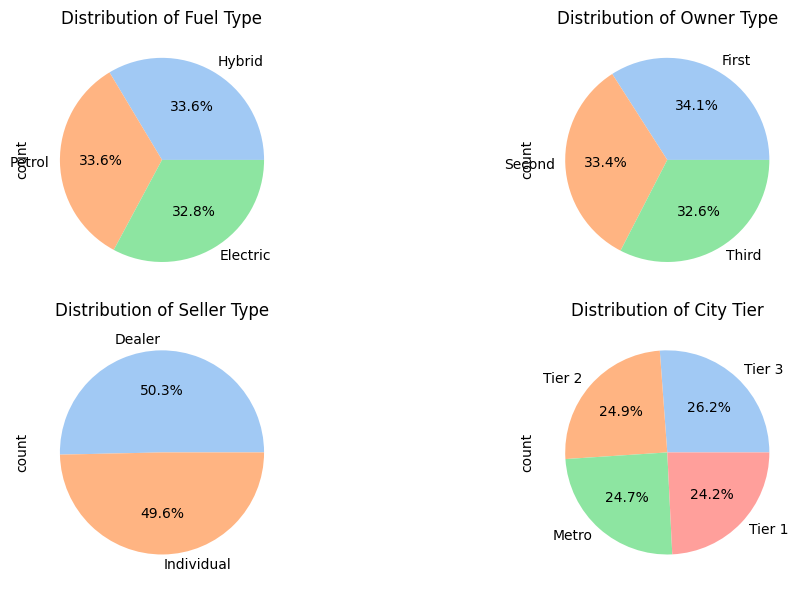

In [ ]:
# Pie charts for categorical variables
categorical_cols = ["Fuel Type", "Owner Type", "Seller Type", "City Tier"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

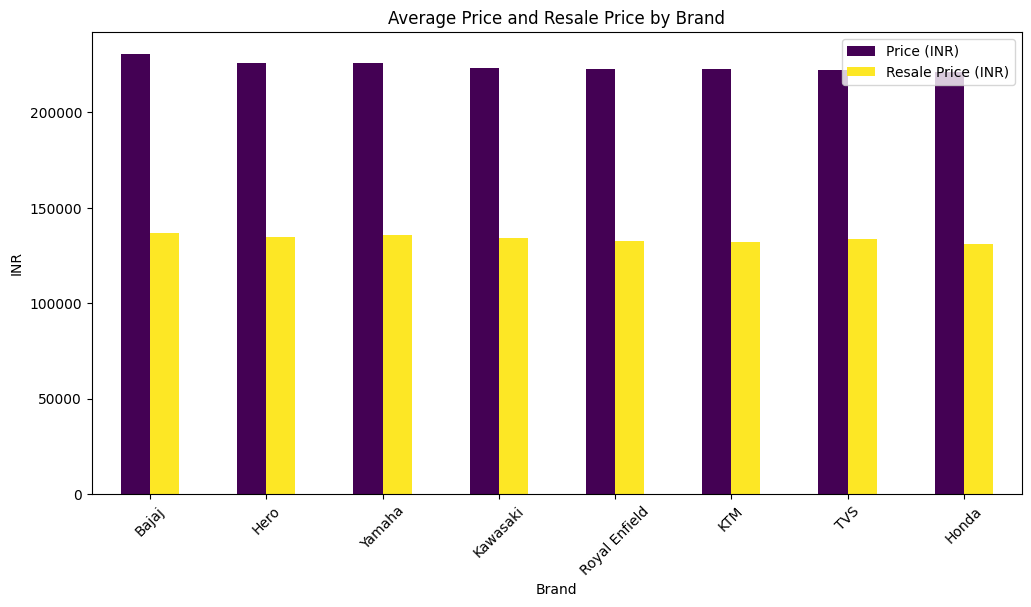

In [ ]:
# Brand-wise average price and resale price
brand_avg_price = df.groupby("Brand")[["Price (INR)", "Resale Price (INR)"]].mean().sort_values(by="Price (INR)", ascending=False)
brand_avg_price.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Average Price and Resale Price by Brand")
plt.ylabel("INR")
plt.xticks(rotation=45)
plt.show()

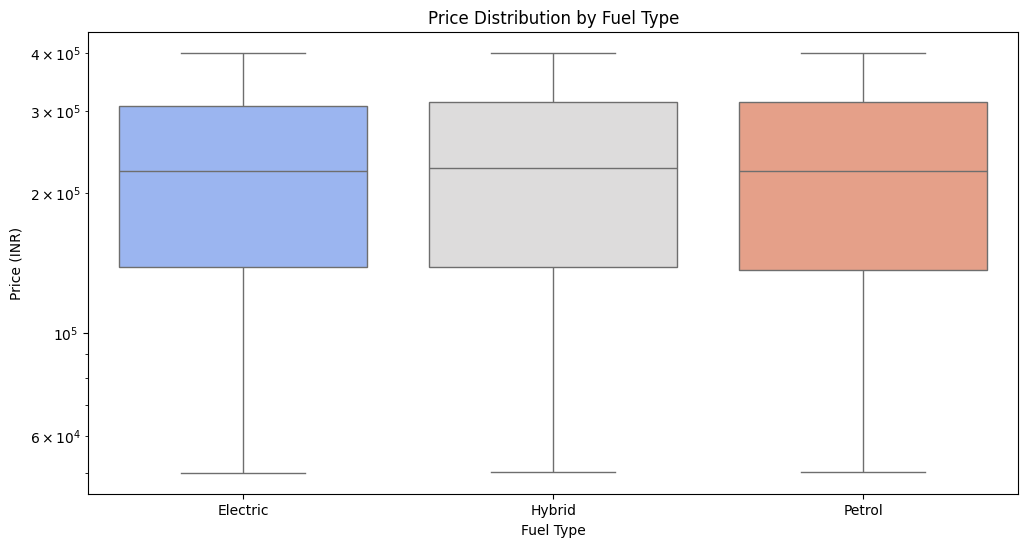

In [ ]:
# Boxplots for numerical distributions by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x="Fuel Type", y="Price (INR)", data=df, palette="coolwarm")
plt.title("Price Distribution by Fuel Type")
plt.yscale("log")  # Log scale for better visualization
plt.show()


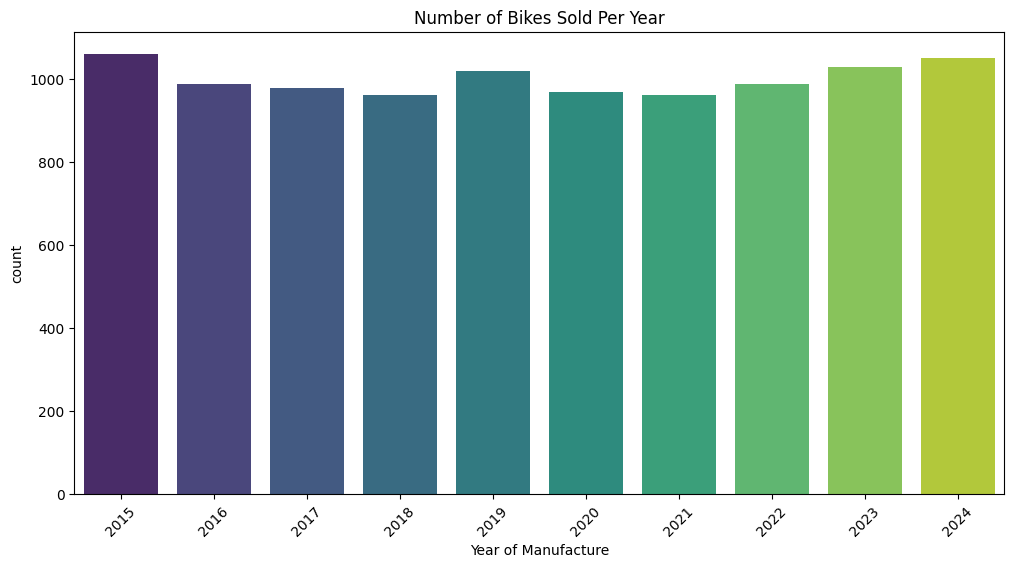

In [ ]:
# Count plot: Number of bikes sold per year
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Year of Manufacture"], palette="viridis")
plt.title("Number of Bikes Sold Per Year")
plt.xticks(rotation=45)
plt.show()

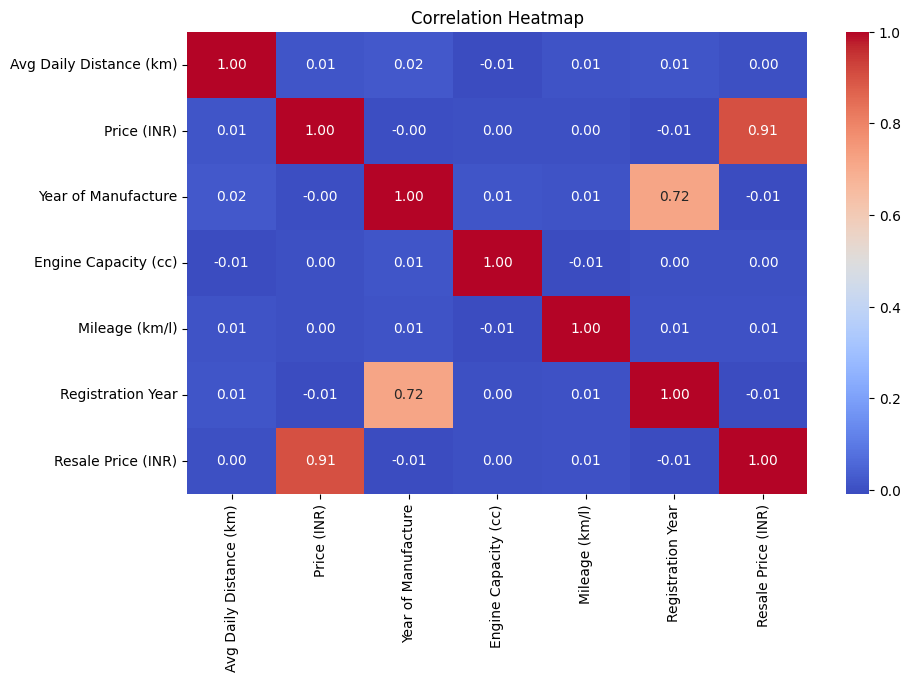

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

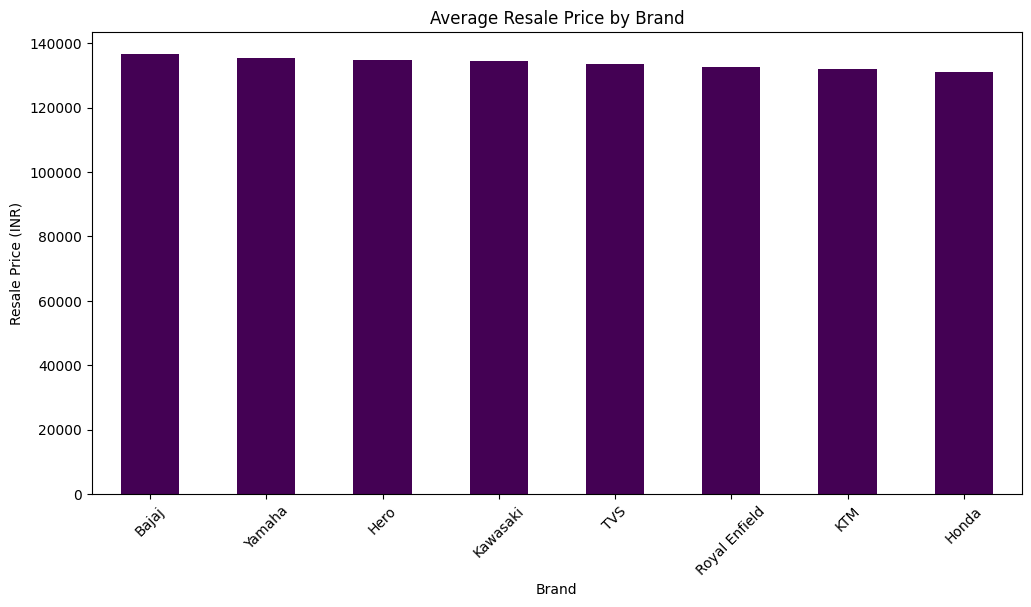

In [ ]:

# Bar chart: Average resale price per brand
brand_avg_resale = df.groupby("Brand")["Resale Price (INR)"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
brand_avg_resale.plot(kind="bar", colormap="viridis")
plt.title("Average Resale Price by Brand")
plt.ylabel("Resale Price (INR)")
plt.xticks(rotation=45)
plt.show()

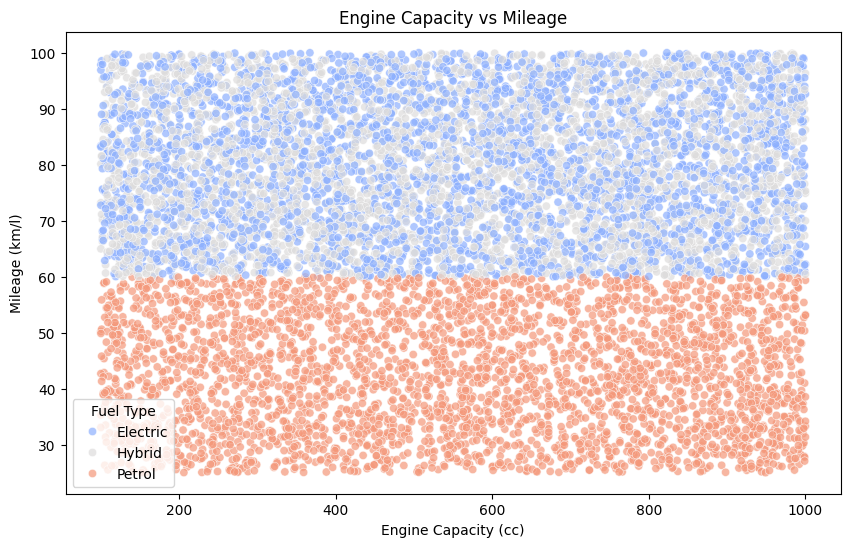

In [ ]:

# Scatter plot: Engine Capacity vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Engine Capacity (cc)"], y=df["Mileage (km/l)"], hue=df["Fuel Type"], palette="coolwarm", alpha=0.7)
plt.title("Engine Capacity vs Mileage")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Mileage (km/l)")
plt.show()

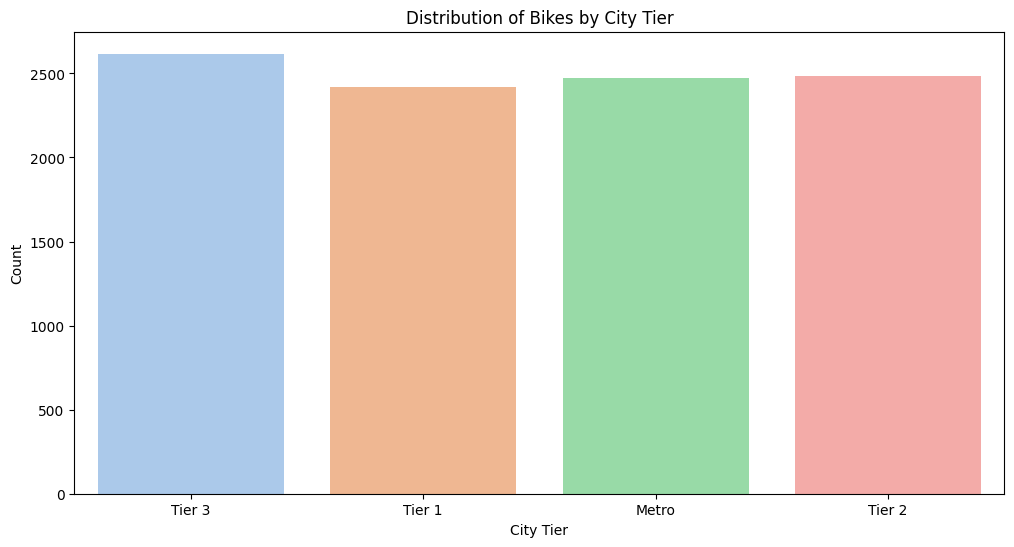

In [ ]:

# Count plot: Bikes available by city tier
plt.figure(figsize=(12, 6))
sns.countplot(x=df["City Tier"], palette="pastel")
plt.title("Distribution of Bikes by City Tier")
plt.xlabel("City Tier")
plt.ylabel("Count")
plt.show()

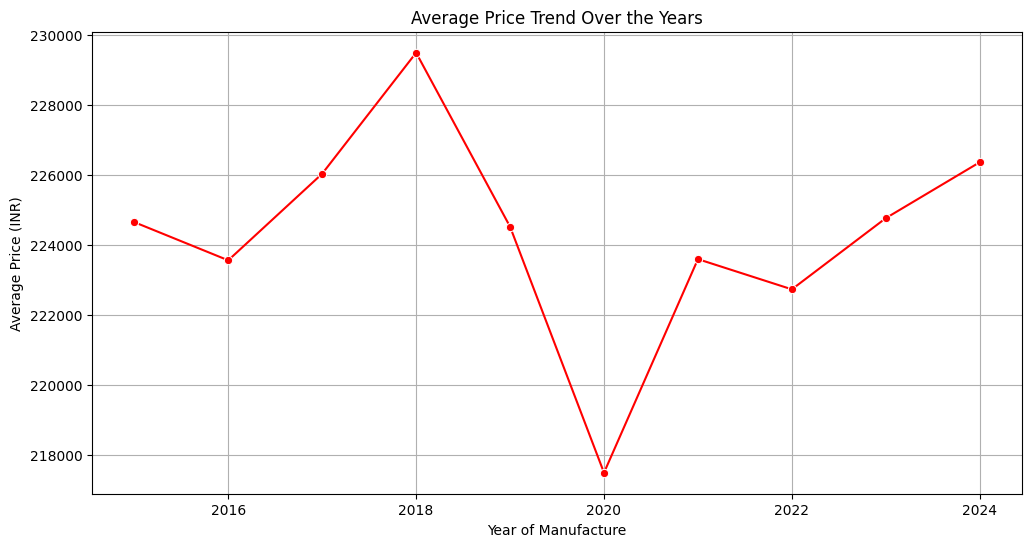

In [ ]:
# Line plot: Price trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year of Manufacture"], y=df["Price (INR)"], estimator='mean', ci=None, marker='o', color='red')
plt.title("Average Price Trend Over the Years")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Price (INR)")
plt.grid(True)
plt.show()